In [1]:
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix

housing = pd.read_csv('housing.csv')
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
housing.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<IPython.core.display.Javascript object>


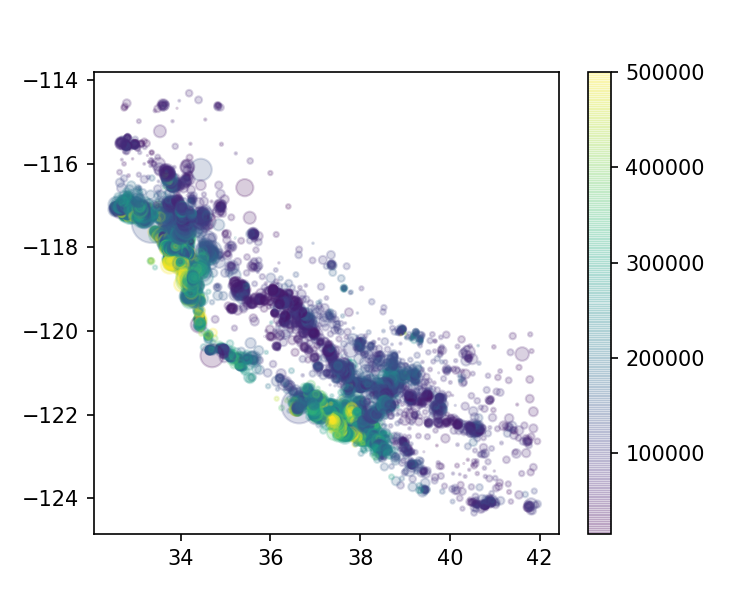

In [4]:
plt.figure(figsize = (5, 4))
plt.scatter(housing.latitude, housing.longitude, alpha = 0.2, c = housing.median_house_value, s = housing.population/100)
plt.colorbar()

<IPython.core.display.Javascript object>


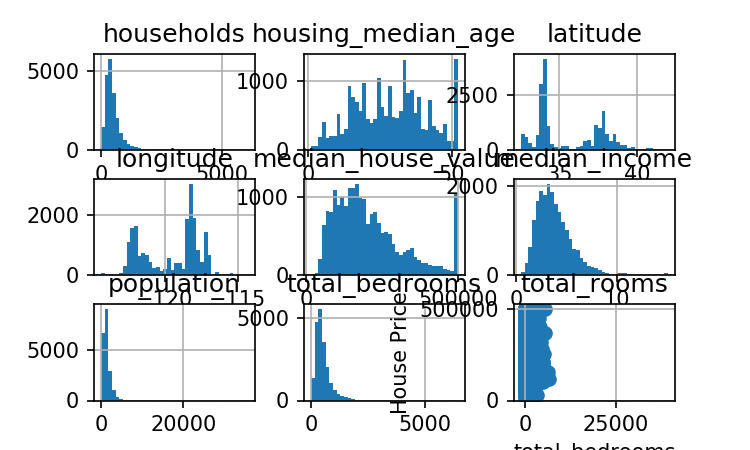

In [5]:
housing.hist(bins = 40, figsize = (5, 3));

In [6]:
y = housing['median_house_value']
X = housing.drop('median_house_value', axis = 1)
X['total_bedrooms'].fillna(X.total_bedrooms.median(), inplace = True)

In [7]:
plt.scatter(X['total_bedrooms'], y)
plt.xlabel('total_bedrooms')
plt.ylabel('House Price')

Text(0,0.5,'House Price')

In [8]:
from sklearn.model_selection import train_test_split
X['rooms_per_house'] = X['total_rooms']/X['households']
X['bedrooms_per_room'] = X['total_bedrooms']/X['total_rooms']
X['population_per_household'] = X['population']/X['households']



In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(15480, 12)
(15480,)
(5160, 12)
(5160,)


In [10]:
train = X_train.join(y_train)
corr_mat = train.corr()
corr_mat['median_house_value'].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.684398
rooms_per_house             0.153307
total_rooms                 0.130550
housing_median_age          0.109649
households                  0.063857
total_bedrooms              0.048206
population_per_household   -0.022021
population                 -0.027363
longitude                  -0.045019
latitude                   -0.142429
bedrooms_per_room          -0.232016
Name: median_house_value, dtype: float64

In [11]:
housing_cols = train[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']]

<IPython.core.display.Javascript object>


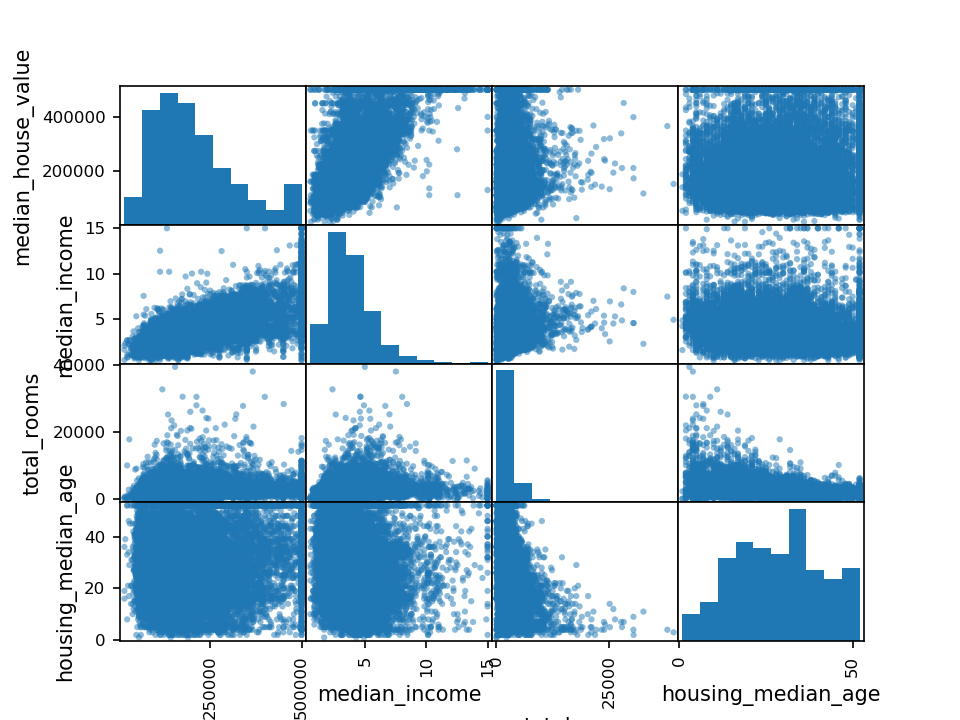

In [12]:
scatter_matrix(housing_cols);

In [13]:
lm = LinearRegression()
X = train['median_income'].values.reshape(-1,1)
y = train['median_house_value']
lm.fit(X,y)
predict = lm.predict(X)
mse = mean_squared_error(predict, y)
print(np.sqrt(mse))
print(lm.score(X, predict))


84214.54664035379
1.0


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 20062 to 236
Data columns (total 13 columns):
longitude                   15480 non-null float64
latitude                    15480 non-null float64
housing_median_age          15480 non-null float64
total_rooms                 15480 non-null float64
total_bedrooms              15480 non-null float64
population                  15480 non-null float64
households                  15480 non-null float64
median_income               15480 non-null float64
ocean_proximity             15480 non-null object
rooms_per_house             15480 non-null float64
bedrooms_per_room           15480 non-null float64
population_per_household    15480 non-null float64
median_house_value          15480 non-null float64
dtypes: float64(12), object(1)
memory usage: 2.3+ MB


In [15]:
dummies = pd.get_dummies(train['ocean_proximity'])
train = train.join(dummies)
train.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_house', 'bedrooms_per_room',
       'population_per_household', 'median_house_value', '<1H OCEAN', 'INLAND',
       'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

In [16]:
train = train.drop('<1H OCEAN', axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 20062 to 236
Data columns (total 17 columns):
longitude                   15480 non-null float64
latitude                    15480 non-null float64
housing_median_age          15480 non-null float64
total_rooms                 15480 non-null float64
total_bedrooms              15480 non-null float64
population                  15480 non-null float64
households                  15480 non-null float64
median_income               15480 non-null float64
ocean_proximity             15480 non-null object
rooms_per_house             15480 non-null float64
bedrooms_per_room           15480 non-null float64
population_per_household    15480 non-null float64
median_house_value          15480 non-null float64
INLAND                      15480 non-null uint8
ISLAND                      15480 non-null uint8
NEAR BAY                    15480 non-null uint8
NEAR OCEAN                  15480 non-null uint8
dtypes: float64(12), object(1),

In [17]:
train = train.drop('ocean_proximity', axis = 1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15480 entries, 20062 to 236
Data columns (total 16 columns):
longitude                   15480 non-null float64
latitude                    15480 non-null float64
housing_median_age          15480 non-null float64
total_rooms                 15480 non-null float64
total_bedrooms              15480 non-null float64
population                  15480 non-null float64
households                  15480 non-null float64
median_income               15480 non-null float64
rooms_per_house             15480 non-null float64
bedrooms_per_room           15480 non-null float64
population_per_household    15480 non-null float64
median_house_value          15480 non-null float64
INLAND                      15480 non-null uint8
ISLAND                      15480 non-null uint8
NEAR BAY                    15480 non-null uint8
NEAR OCEAN                  15480 non-null uint8
dtypes: float64(12), uint8(4)
memory usage: 2.2 MB


In [18]:
y = train['median_house_value']
X = train.drop('median_house_value', axis = 1)

In [19]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
pipeline = Pipeline([('std_scaler', StandardScaler()),
                    ('poly_features', PolynomialFeatures(degree = 2))])
housing_prepared = pipeline.fit_transform(X)

In [20]:
lm = LinearRegression()
lm.fit(housing_prepared, y)
lm.score(housing_prepared, y)
lm.predict(housing_prepared[:10])


array([ 82537.28918457, 170435.45739746, 113083.08056641, 333663.33239746,
       536156.27636719, 162735.95483398, 111232.48254395, 366481.28308105,
       313511.94836426, 146382.18615723])

In [21]:
predictions = lm.predict(housing_prepared)

mse = mean_squared_error(predictions, y)
rmse = np.sqrt(mse)
rmse

60849.09504899638

In [22]:

#dir(housing)
train_x = housing.drop(['total_rooms','total_bedrooms','households',
                        'ocean_proximity','median_house_value'],axis=1)
train_y = housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

In [23]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
alphas = [0.5, 1, 4, 10, 50, 100]
param_grid = [
    {'alpha': alphas}
]
grid_search = GridSearchCV(lasso, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, y)

C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.5, 1, 4, 10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [24]:
grid_search.best_estimator_

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
lasso = grid_search.best_estimator_

In [26]:
lasso.fit(housing_prepared, y)

C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [27]:
predictions = lasso.predict(housing_prepared)
mse = mean_squared_error(predictions, y)
rmse = np.sqrt(mse)
rmse


61365.176068848144

In [28]:
from sklearn.linear_model import Ridge

ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(X_train, y_train)
print(ridge.predict(X_test))
print(np.sqrt(mean_squared_error(y_test,ridge.predict(X_test))))


[101004.34012243 109377.31302481 166214.32994817 ... 124730.26257506
 151956.75622237 222630.30131557]
75525.41947302387


In [29]:
enet = ElasticNet()
alphas = [0.1, 0.5, 1, 4, 10, 50, 100]
param_grid = [
    {'alpha': alphas}
]
grid_search = GridSearchCV(enet, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared, y)

C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coo

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': [0.1, 0.5, 1, 4, 10, 50, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [30]:
enet = grid_search.best_estimator_
enet.fit(housing_prepared, y)

C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
predictions = enet.predict(housing_prepared)
mse = mean_squared_error(predictions, y)
print(np.sqrt(mse))

69626.58938937157


In [32]:
from sklearn.ensemble import RandomForestRegressor
rg=RandomForestRegressor(n_estimators=30)
rg.fit(X_train, y_train)
print(rg.predict(X_test))
print(np.sqrt(mean_squared_error(y_test,rg.predict(X_test))))

C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[106456.66666667  93043.33333333 127246.66666667 ... 111636.66666667
 154906.66666667 163773.33333333]
50790.212436610185


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(y_pred)
print(acc)
#print(y_pred)

[ 72200. 124500. 183500. ...  81800.  84700. 113500.]
0.011385658914728682


In [34]:
from sklearn.tree import DecisionTreeClassifier
y = train['median_house_value']
X = train.drop('median_house_value', axis = 1)
#print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
a=dtc.score(X_test, y_test)
b=dtc.predict(X_test)
print(a)
print(b)

0.028165374677002582
[180400. 210800.  93400. ... 228500. 273800. 329500.]


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import metrics

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
melb_preds = forest_model.predict(X_test)
acc=forest_model.score(X_test, y_test)
print(melb_preds)
print(acc)
print(forest_model.feature_importances_)

[180400. 382500. 192900. ... 156800. 122100. 350400.]
0.03772609819121447
[0.08729998 0.08875852 0.07906773 0.08503427 0.08497244 0.08584077
 0.08485506 0.10453043 0.09312274 0.09341732 0.09374338 0.0048726
 0.         0.0061717  0.00831306]


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

reg = LinearRegression().fit(X_train, y_train)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(reg.score(X_test, y_test))

reg.coef_

reg.intercept_ 

(11610, 15)
(11610,)
(3870, 15)
(3870,)
0.6420951127732457


C:\Users\daksh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


-2278685.150366869

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
a=dtc.score(X_test, y_test)
b=dtc.predict(X_test)
print(a)
print(b)

0.027906976744186046
[210700. 178100. 142600. ... 231700. 273800. 227100.]
